# Morphological Approach based for paragraph recognitive on Digital Text Images

## import Module

 we use scikit-image as bibliotheque image processing

In [1]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage import io
import cv2
import numpy as np
import skimage

## Plot image Digital text Images


(-0.5, 1497.5, 1811.5, -0.5)

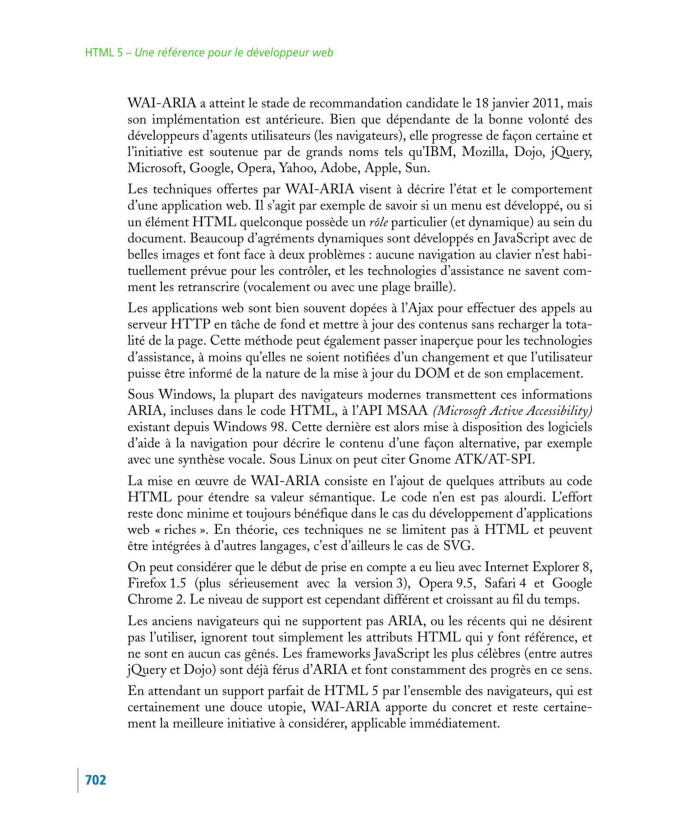

In [2]:
%matplotlib inline
image_1 = io.imread("data/image/simple_a26.jpg")

plt.figure(figsize=(15,15))
plt.imshow(image_1)
plt.axis('off')

## Plot Histograme Images

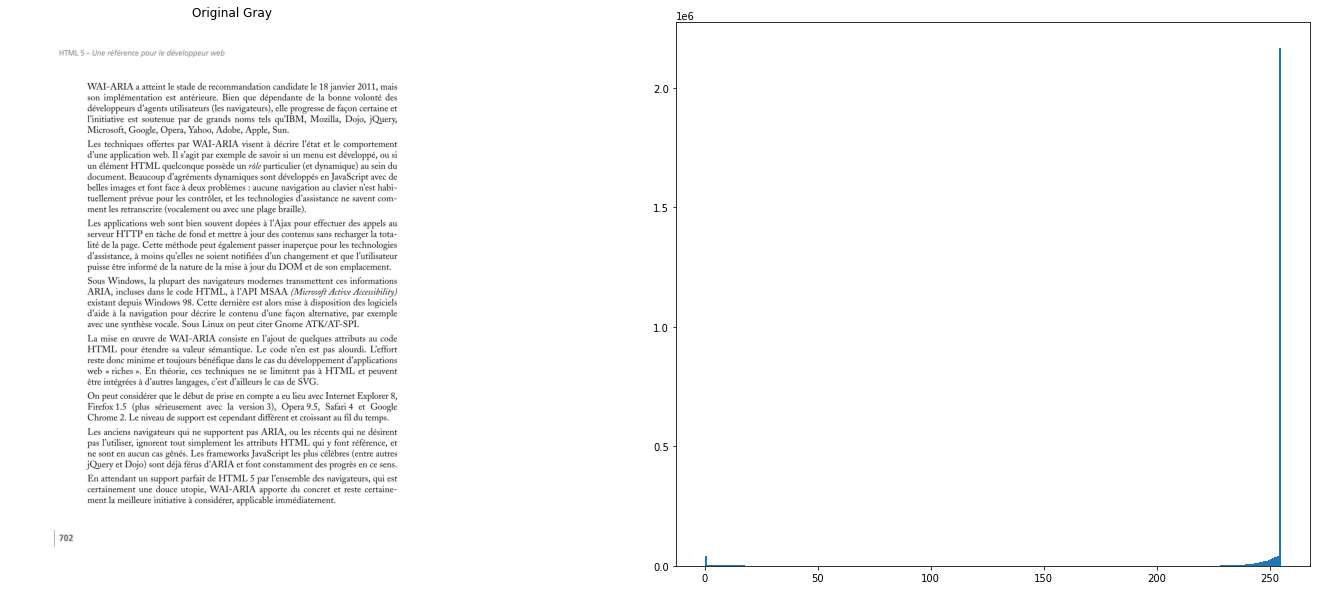

In [3]:

gray_image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(ncols=2, figsize=(25, 10))
ax = axes.ravel()

ax[0] = plt.subplot(121)
ax[1] = plt.subplot(122)


ax[0].imshow(gray_image_1,'gray')
ax[0].set_title('Original Gray')
ax[0].axis('off')

ax[1].hist(gray_image_1.ravel(),bins=256)

plt.show()

## Filtrage par egalisation d'historgramme

In [4]:
def histeq( I ) :
    h,centers = skimage.exposure.histogram(I,source_range='dtype', normalize=True )
    cdf= h.cumsum()
    # op ér a t i on d ' é g al i s a t i o n
    resultat = 255 * cdf[I]

    resultat = resultat.astype(np.uint8)

    # Les l i g n e s su i v an t es ne s erv en t qu ' à l ' a f f i c h a g e avec deux axes
    
    fig, ax1 = plt.subplots( )

    color='tab:red'

    ax1.plot(centers , h, color=color)

    ax1.set_ylabel('Histogramme', color = color)

    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx ( ) # i n s t a n t i a t e a second axes t h a t shares the same x− a x i s
    color = 'tab:blue'
    ax2.set_ylabel('Histogramme cumulé' , color = color)
    ax2.plot(centers , cdf, color = color)
    ax2.tick_params(axis='y' , labelcolor=color)
    fig.tight_layout() # o th erw is e the r i g h t y− l a b el i s s l i g h t l y cl i p p e d
    plt.show()
    return resultat

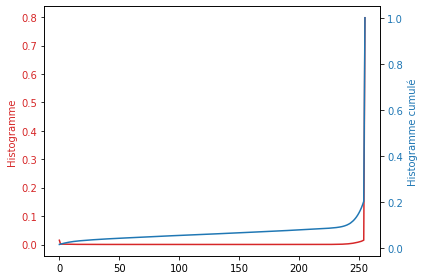

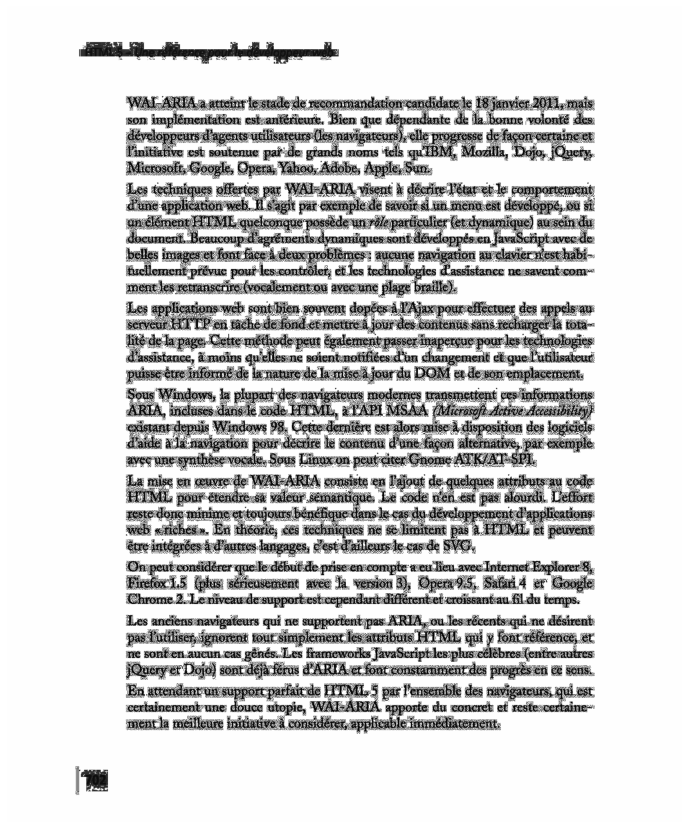

In [5]:
Ieq = histeq(gray_image_1)

plt.figure(figsize=(15,15))
plt.imshow(Ieq , 'gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

## threholding image

(1812, 1498, 3) uint8 51


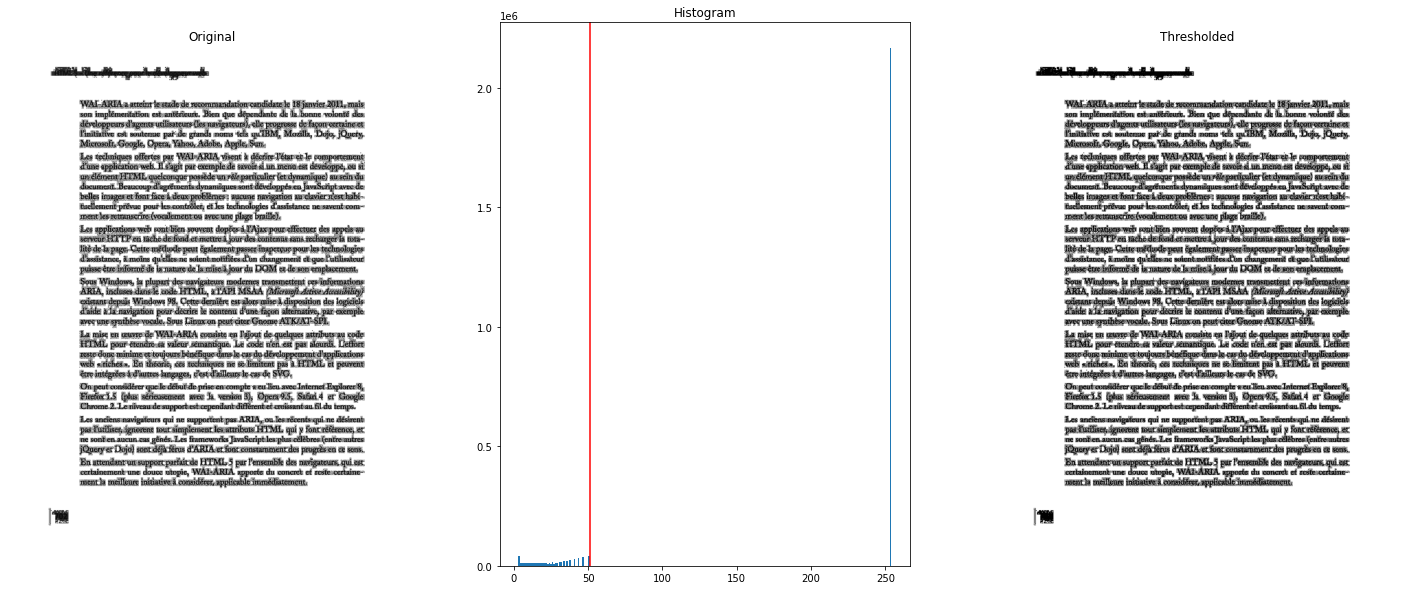

In [6]:

thresh_1 = threshold_otsu(Ieq)
print(image_1.shape,image_1.dtype,thresh_1)
binary_1 = Ieq > thresh_1

fig, axes = plt.subplots(ncols=3, figsize=(25, 10))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(Ieq,'gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(Ieq.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh_1, color='r')

ax[2].imshow(binary_1, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

## Filtre for move figure in image

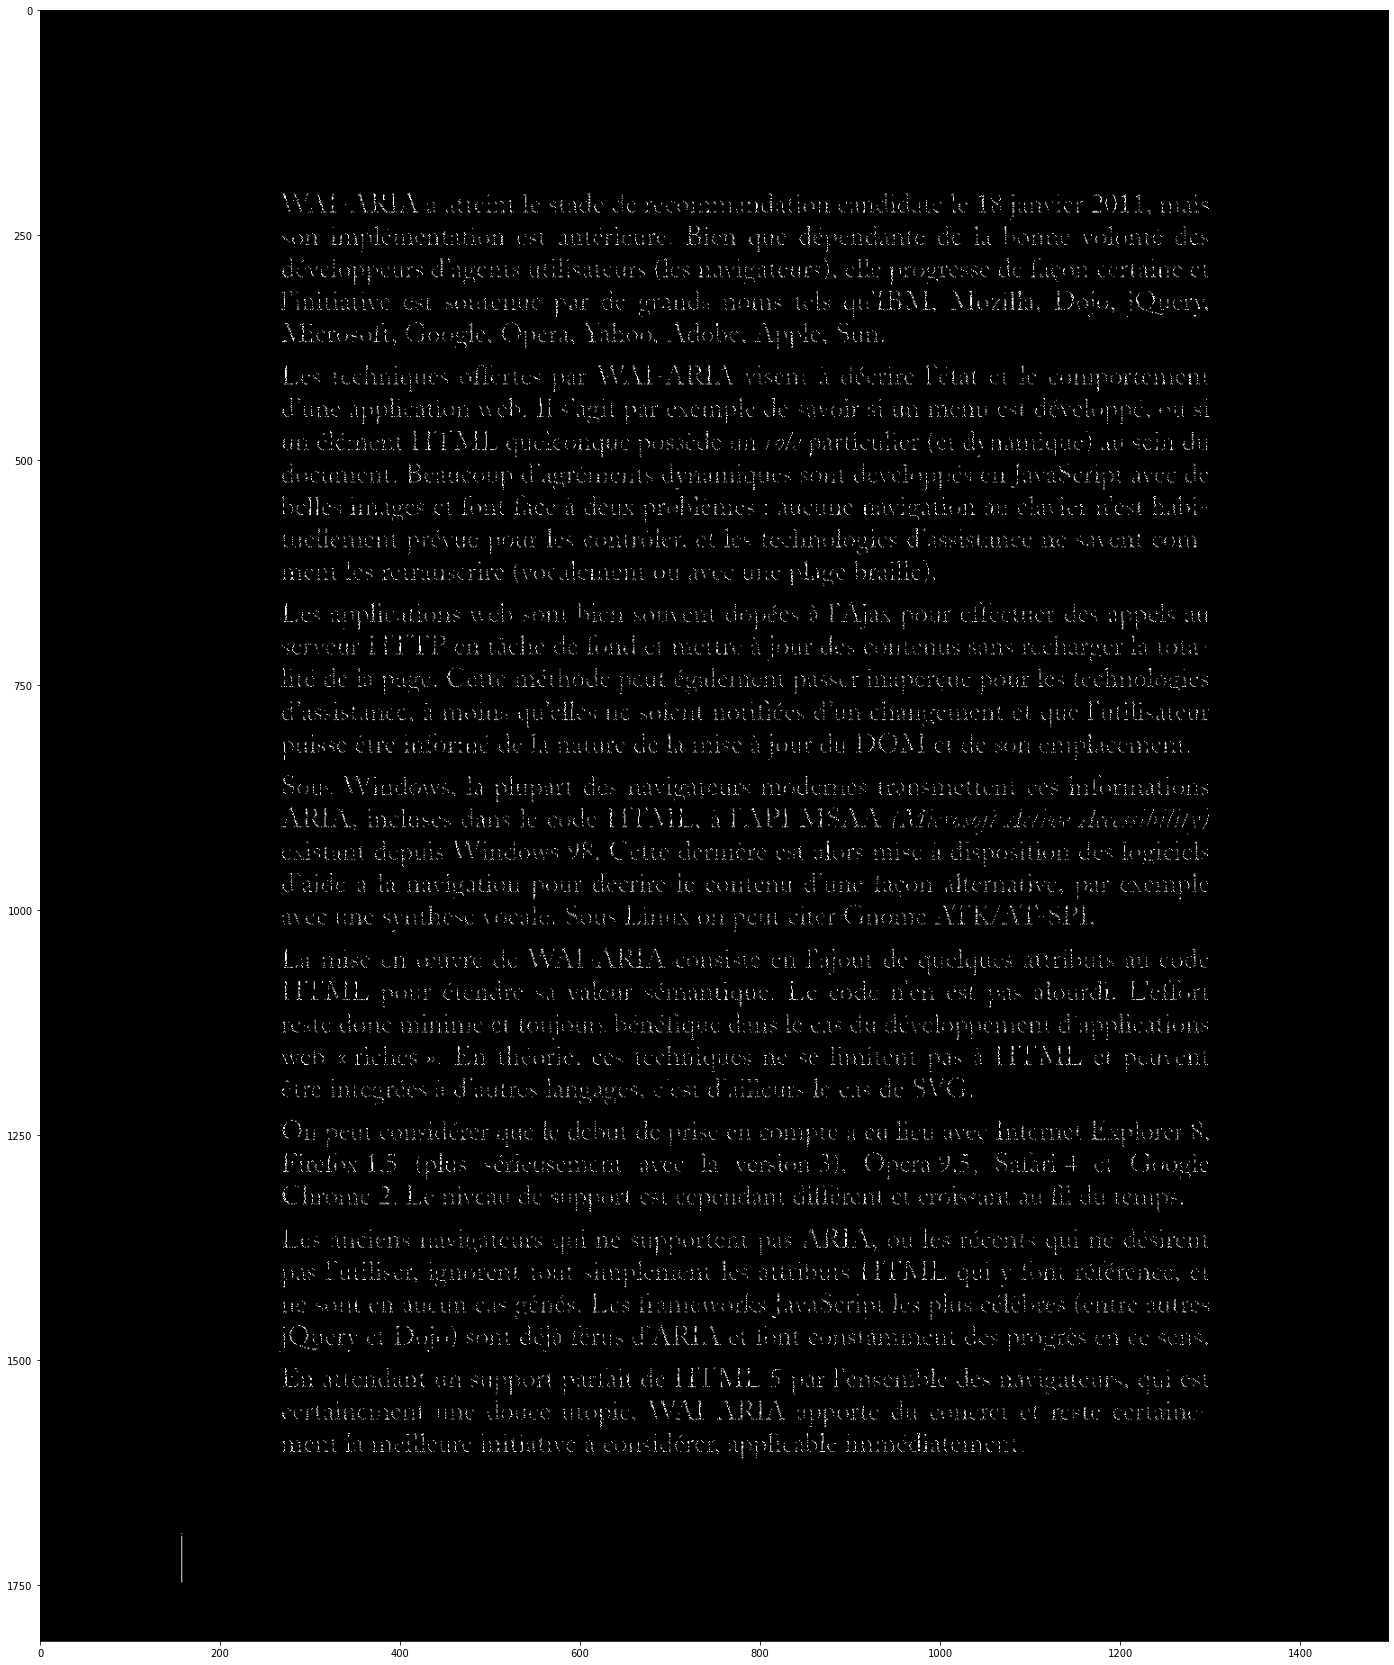

In [7]:
image_filtre  =  gray_image_1 == 0
plt.figure(figsize=(50,30))
plt.imshow(image_filtre,'gray')
plt.show()

# morphology operation

(1812, 1498)


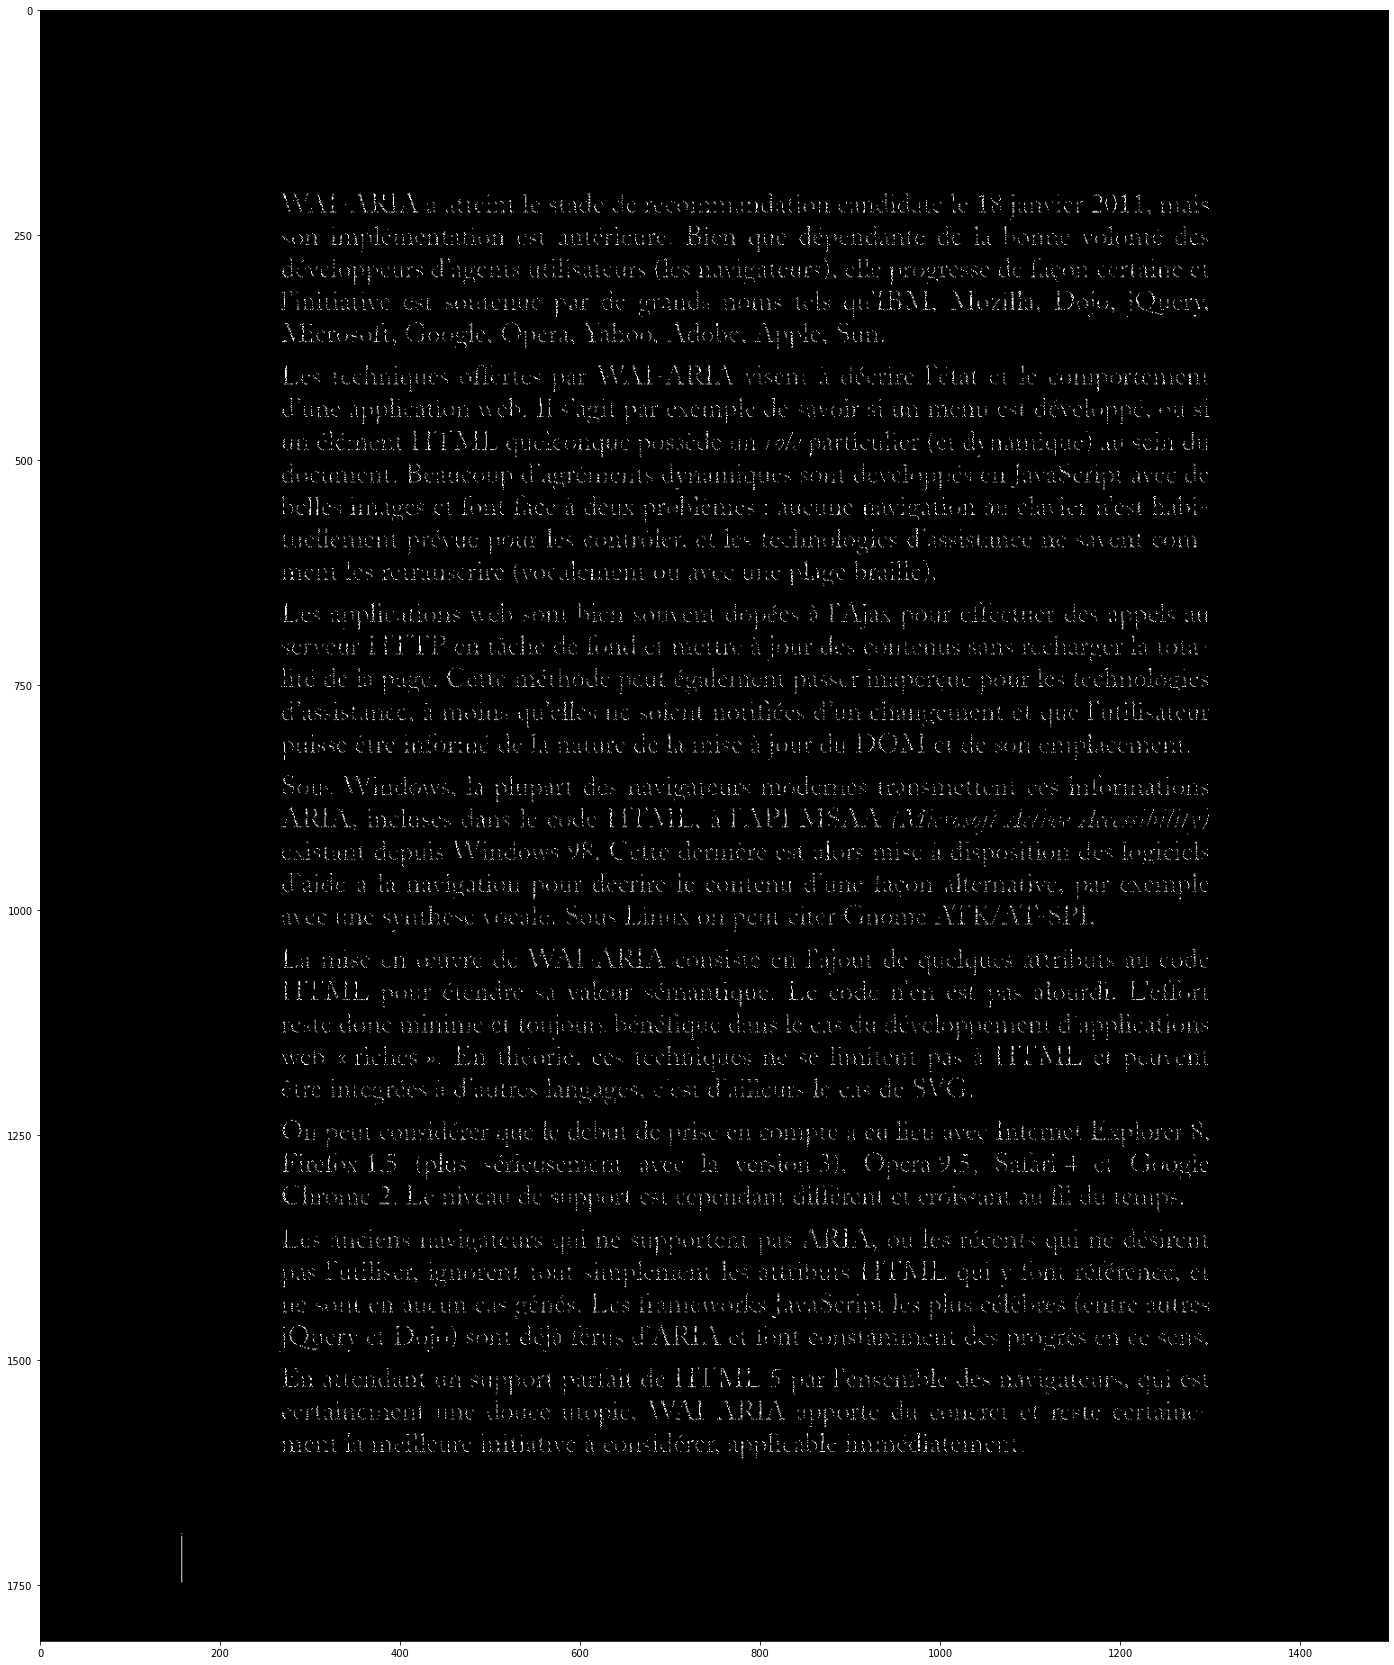

In [8]:
erose = skimage.morphology.binary_erosion(image_filtre, selem=np.ones(shape=(1,1)), out=None)

plt.figure(figsize=(50,30))
print(erose.shape)
plt.imshow(erose,'gray')
plt.show()

(1812, 1498)


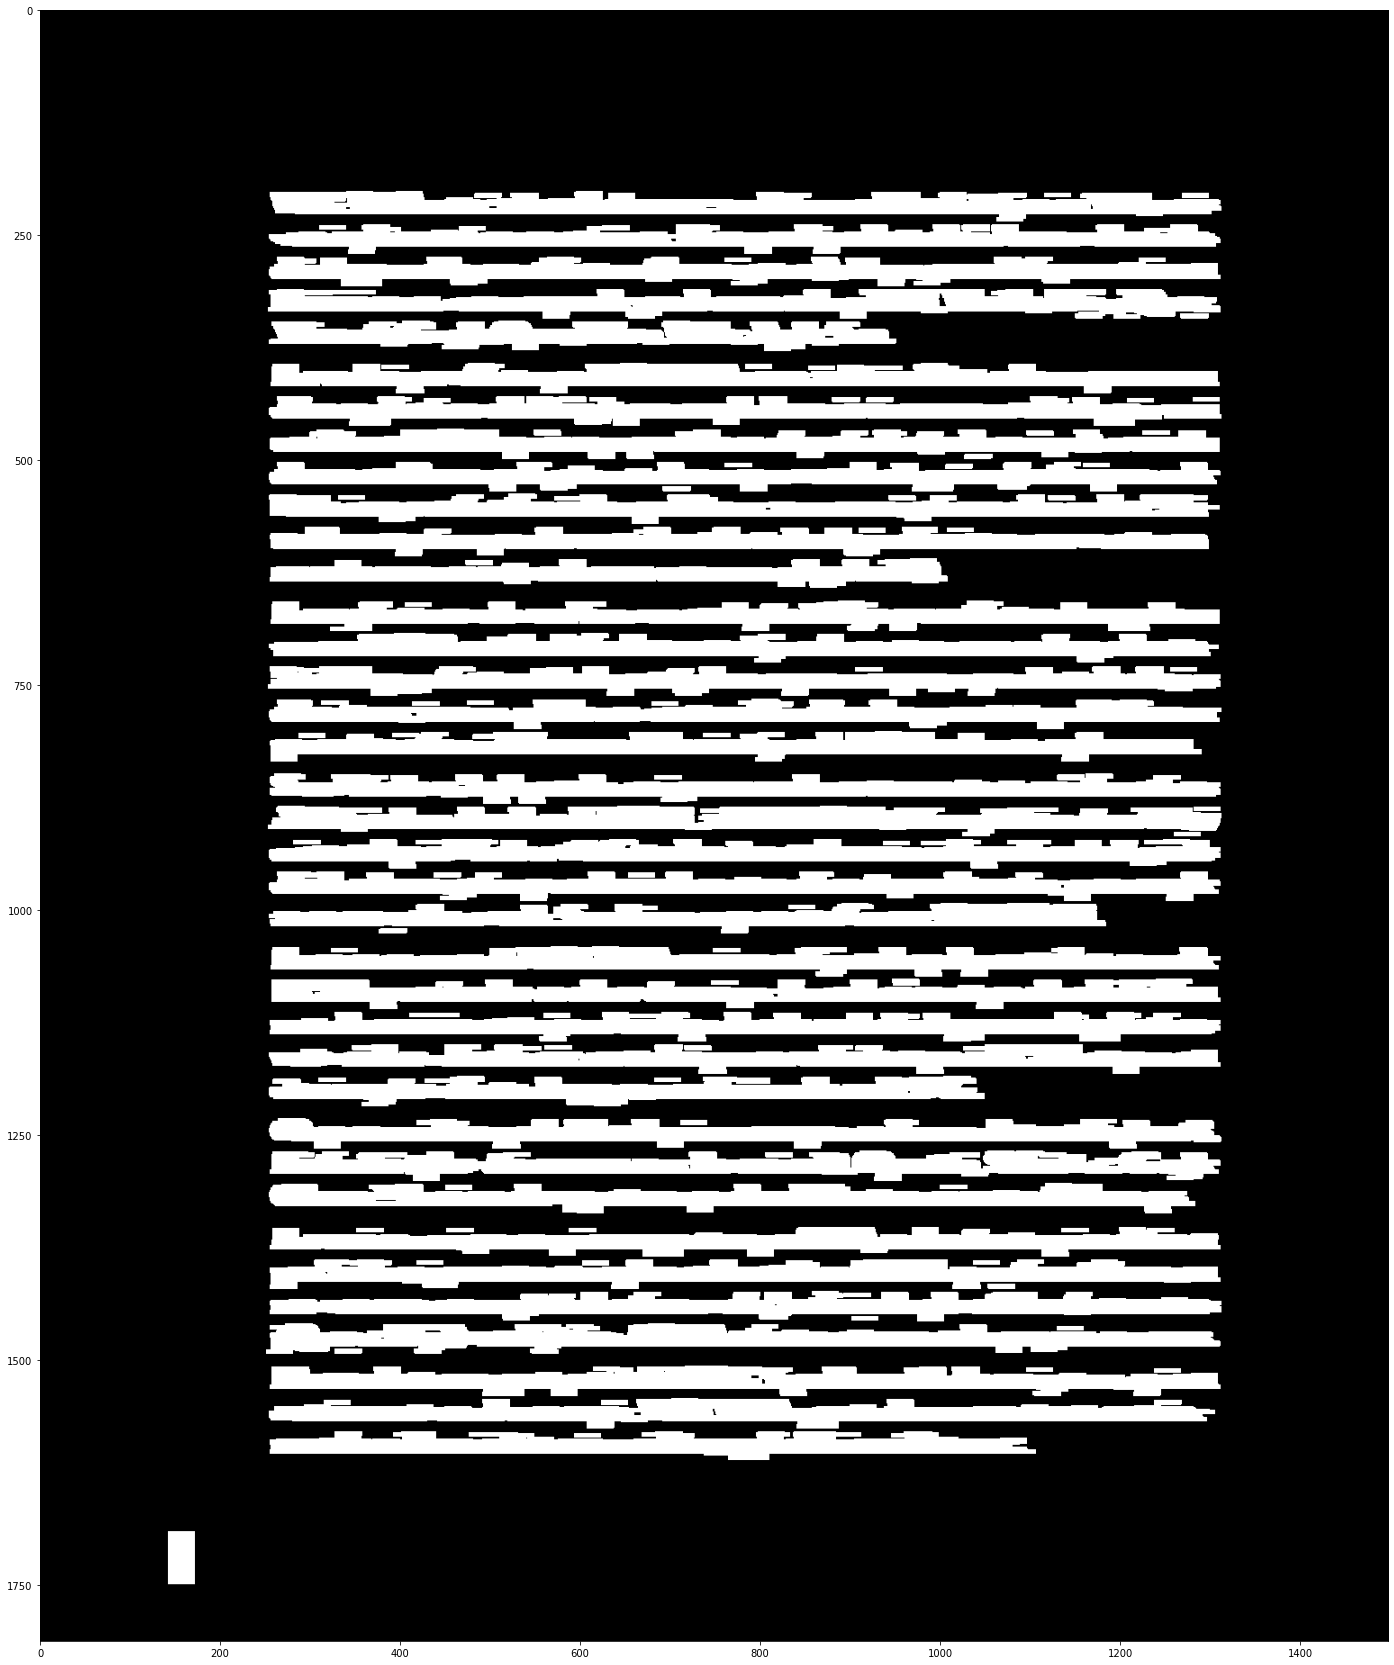

In [19]:
dilate = skimage.morphology.binary_dilation(erose, selem=np.ones(shape=(5,30)), out=None)
plt.figure(figsize=(50,30))
print(dilate.shape)
plt.imshow(dilate,'gray')
plt.show()

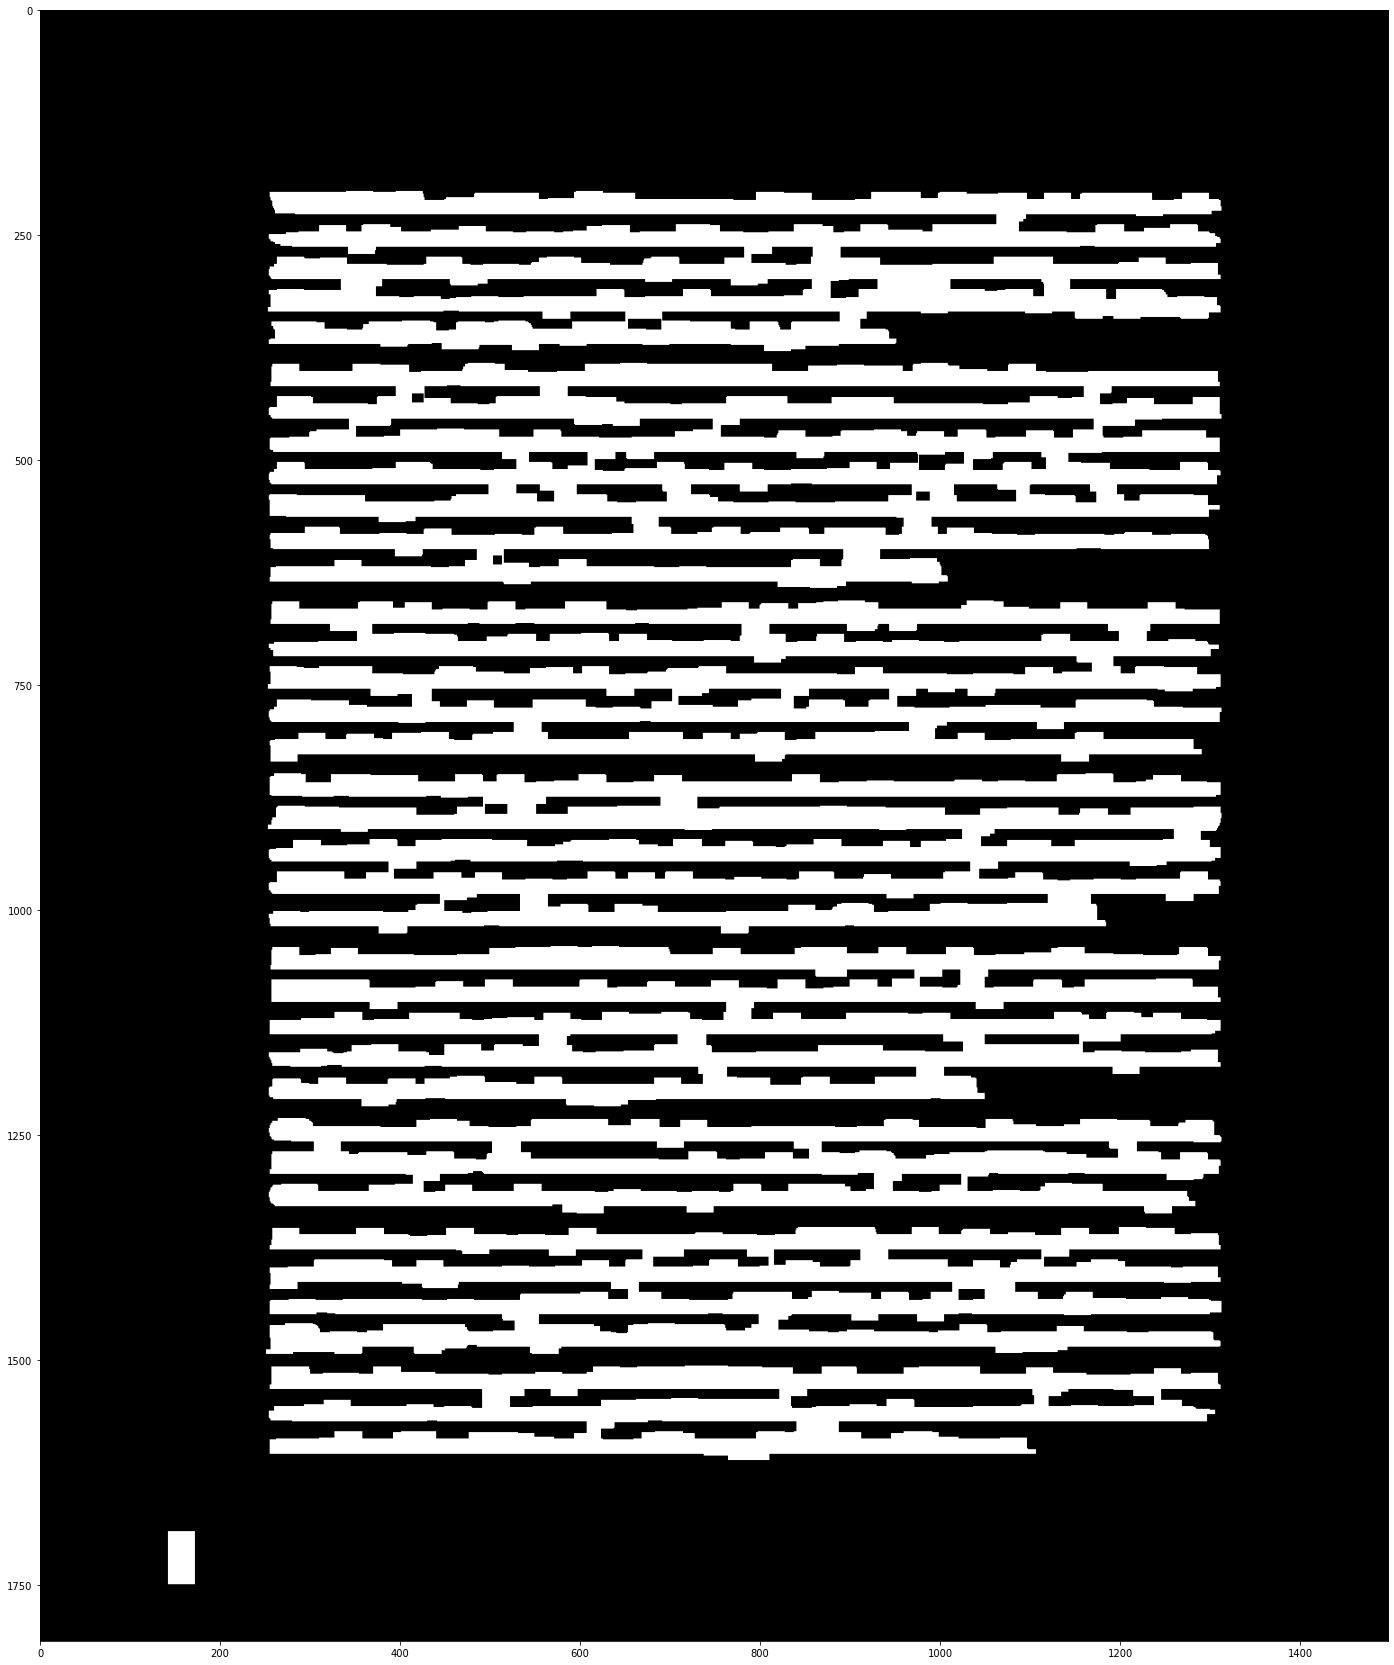

In [20]:
close = skimage.morphology.closing(dilate, selem=np.ones(shape=(10,10)), out=None)
plt.figure(figsize=(50,30))
plt.imshow(close, 'gray')
plt.show()

## Find Block Paragraph and Draw

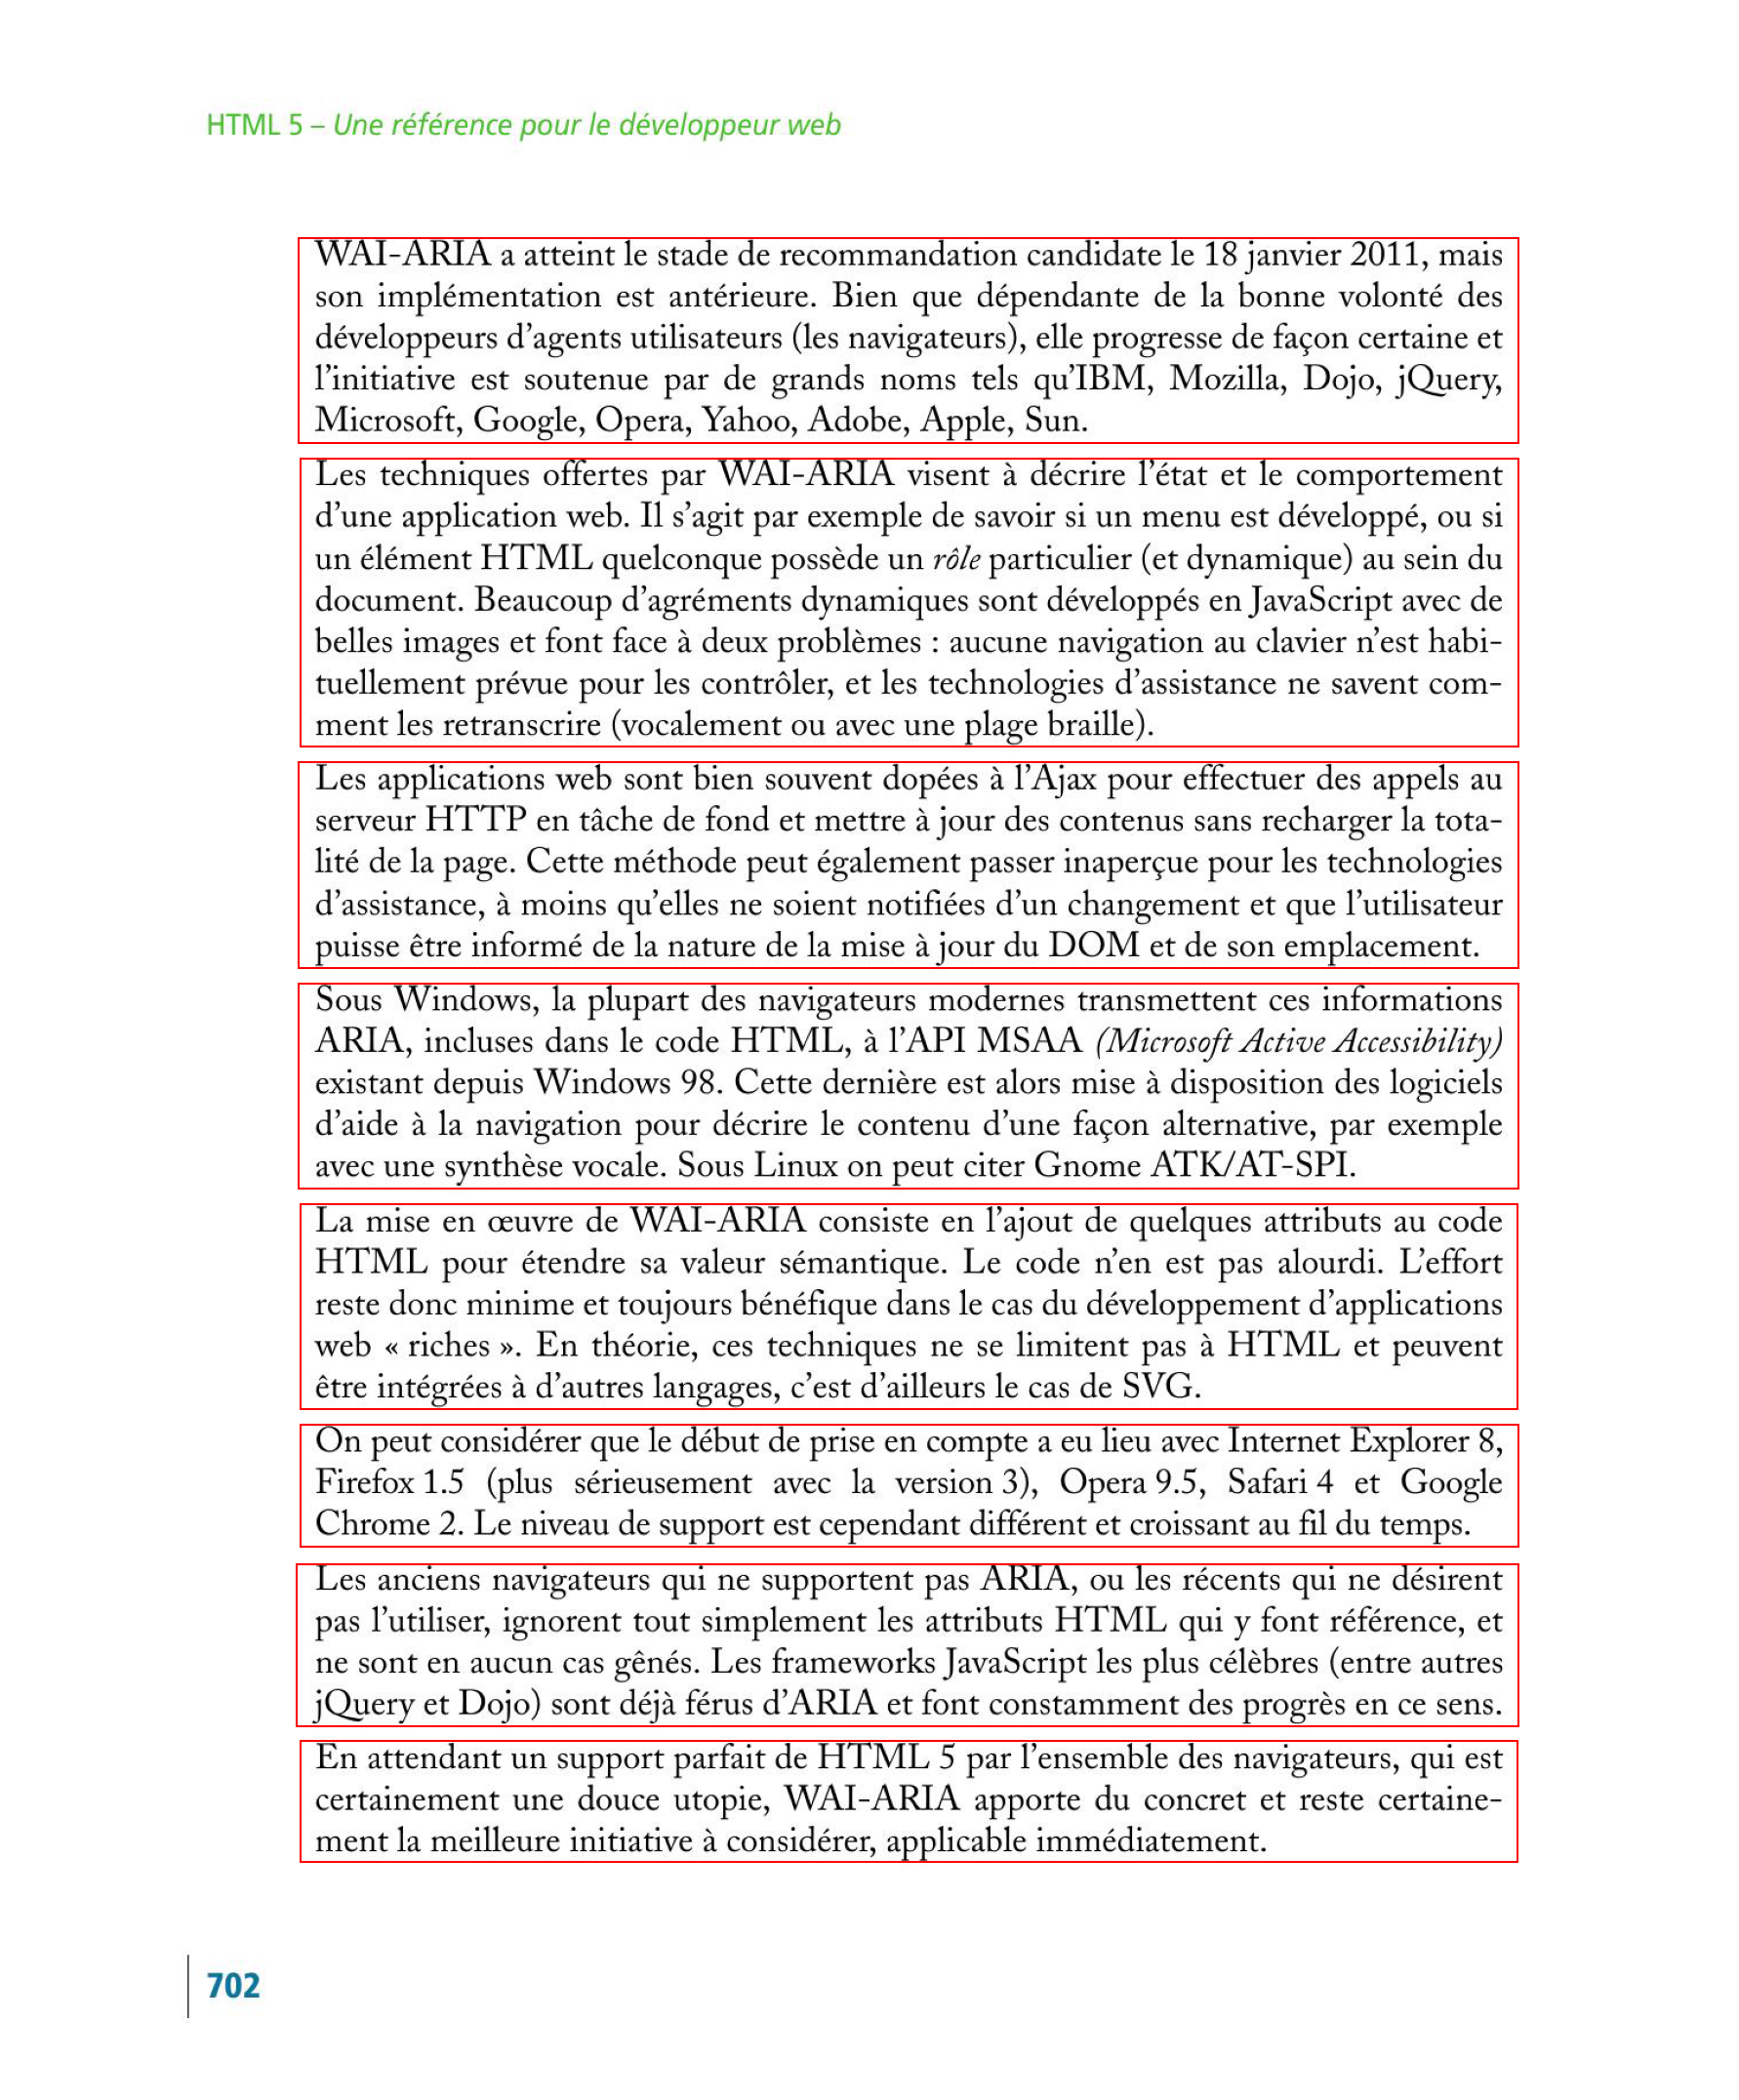

In [21]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb



# apply threshold
thresh = threshold_otsu(close)
bw = closing(close > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)

# plt.figure(figsize=(50,30))
# plt.imshow(bw,'gray')
# plt.axis('image')
# plt.show()

# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=close, bg_label=0)

# plt.figure(figsize=(50,30))
# plt.imshow(image_label_overlay)
# plt.axis('image')
# plt.show()

fig, ax = plt.subplots(figsize=(50, 30))
ax.imshow(image_1)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 15000:
#         print(region.area)
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.savefig('image4_paragrap_recognitive.jpg')
plt.show()